In [19]:
%matplotlib inline
import numpy as np
import pylab as plt
import tensorflow as tf
import PIL
import os, glob, random
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

VERSION = 3

In [20]:
# see https://medium.com/@JeansPantRushi/fix-for-tensorflow-v2-failed-to-get-convolution-algorithm-b367a088b56e
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(tf.config.experimental.list_physical_devices('GPU'))
print(tf.version.VERSION)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.1.0


# Build Model (Tensorflow 2.)

In [21]:
#IMG_HEIGHT, IMG_WIDTH = (48, 64)
IMG_HEIGHT, IMG_WIDTH = (96, 128)

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    #Dense(1, activation='sigmoid')
    Dense(4)
])

model.compile(optimizer='adam',
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 96, 128, 16)       448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 64, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 64, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 16, 64)       

# Build training vectors

In [22]:
TRAIN_DIR = 'train'
VALIDATION_DIR = 'validation'

train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=5,
                                           width_shift_range=.1,
                                           height_shift_range=.1,
                                           brightness_range=(.5,1.5),
                                           shear_range=0.1,
                                           channel_shift_range=0.1,
                                           zoom_range=0.1,
                                           ) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
train_data_gen = train_image_generator.flow_from_directory(batch_size=400,
                                                           directory=TRAIN_DIR,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=40,
                                                              directory=VALIDATION_DIR,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 800 images belonging to 4 classes.
Found 73 images belonging to 4 classes.


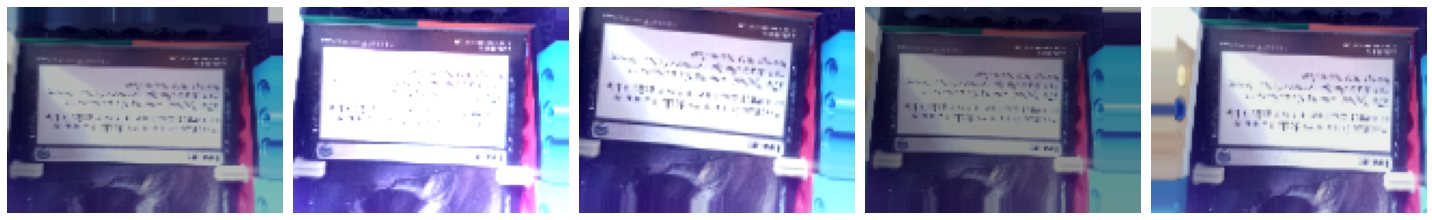

In [23]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plot_imgs(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_imgs(augmented_images)

# Train Model

In [24]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples/train_data_gen.batch_size,
    epochs=300,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples/val_data_gen.batch_size,
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2.0 steps, validate for 1.825 steps
Epoch 1/300
2/2 [==============================] - 6s 3s/step - loss: 2.2154 - accuracy: 0.2512 - val_loss: 2.1624 - val_accuracy: 0.4521
Epoch 2/300
2/2 [==============================] - 5s 2s/step - loss: 1.9485 - accuracy: 0.3512 - val_loss: 1.4899 - val_accuracy: 0.1918
Epoch 3/300
2/2 [==============================] - 5s 2s/step - loss: 1.2958 - accuracy: 0.2037 - val_loss: 1.3826 - val_accuracy: 0.3288
Epoch 4/300
2/2 [==============================] - 5s 2s/step - loss: 1.1582 - accuracy: 0.4700 - val_loss: 1.3555 - val_accuracy: 0.3288
Epoch 5/300
2/2 [==============================] - 5s 2s/step - loss: 1.1469 - accuracy: 0.4700 - val_loss: 1.3564 - val_accuracy: 0.3288
Epoch 6/300
2/2 [==============================] - 5s 2s/step - loss: 1.1345 - accuracy: 0.4700 - val_loss: 1.3421 - val_accuracy: 0.3288


2/2 [==============================] - 5s 2s/step - loss: 0.1578 - accuracy: 0.9400 - val_loss: 0.1913 - val_accuracy: 0.9452
Epoch 57/300
2/2 [==============================] - 5s 2s/step - loss: 0.1562 - accuracy: 0.9475 - val_loss: 0.1276 - val_accuracy: 0.9726
Epoch 58/300
2/2 [==============================] - 5s 2s/step - loss: 0.1443 - accuracy: 0.9550 - val_loss: 0.0920 - val_accuracy: 0.9863
Epoch 59/300
2/2 [==============================] - 5s 2s/step - loss: 0.1418 - accuracy: 0.9550 - val_loss: 0.1027 - val_accuracy: 0.9726
Epoch 60/300
2/2 [==============================] - 5s 3s/step - loss: 0.1354 - accuracy: 0.9450 - val_loss: 0.1907 - val_accuracy: 0.9726
Epoch 61/300
2/2 [==============================] - 5s 2s/step - loss: 0.1526 - accuracy: 0.9450 - val_loss: 0.1777 - val_accuracy: 0.9452
Epoch 62/300
2/2 [==============================] - 5s 2s/step - loss: 0.1365 - accuracy: 0.9500 - val_loss: 0.1211 - val_accuracy: 0.9726
Epoch 63/300
2/2 [======================

Epoch 115/300
2/2 [==============================] - 5s 3s/step - loss: 0.0584 - accuracy: 0.9812 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 116/300
2/2 [==============================] - 5s 2s/step - loss: 0.0412 - accuracy: 0.9925 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 117/300
2/2 [==============================] - 5s 2s/step - loss: 0.0475 - accuracy: 0.9837 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 118/300
2/2 [==============================] - 5s 2s/step - loss: 0.0475 - accuracy: 0.9875 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 119/300
2/2 [==============================] - 5s 2s/step - loss: 0.0428 - accuracy: 0.9850 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 120/300
2/2 [==============================] - 5s 2s/step - loss: 0.0484 - accuracy: 0.9875 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 121/300
2/2 [==============================] - 5s 3s/step - loss: 0.0346 - accuracy: 0.9887 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 122/300
2/2 [=

2/2 [==============================] - 5s 3s/step - loss: 0.0157 - accuracy: 0.9962 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 174/300
2/2 [==============================] - 5s 2s/step - loss: 0.0169 - accuracy: 0.9937 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 175/300
2/2 [==============================] - 5s 2s/step - loss: 0.0353 - accuracy: 0.9925 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 176/300
2/2 [==============================] - 5s 2s/step - loss: 0.0191 - accuracy: 0.9962 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 177/300
2/2 [==============================] - 5s 2s/step - loss: 0.0245 - accuracy: 0.9900 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 178/300
2/2 [==============================] - 5s 2s/step - loss: 0.0137 - accuracy: 0.9950 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 179/300
2/2 [==============================] - 5s 2s/step - loss: 0.0253 - accuracy: 0.9925 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 180/300
2/2 [===============

2/2 [==============================] - 5s 2s/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.0124 - val_accuracy: 0.9863
Epoch 232/300
2/2 [==============================] - 5s 2s/step - loss: 0.0127 - accuracy: 0.9975 - val_loss: 0.0123 - val_accuracy: 0.9863
Epoch 233/300
2/2 [==============================] - 5s 2s/step - loss: 0.0157 - accuracy: 0.9925 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 234/300
2/2 [==============================] - 5s 3s/step - loss: 0.0160 - accuracy: 0.9975 - val_loss: 0.0106 - val_accuracy: 0.9863
Epoch 235/300
2/2 [==============================] - 5s 3s/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0130 - val_accuracy: 0.9863
Epoch 236/300
2/2 [==============================] - 5s 2s/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0145 - val_accuracy: 0.9863
Epoch 237/300
2/2 [==============================] - 5s 2s/step - loss: 0.0105 - accuracy: 0.9962 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 238/300
2/2 [===============

2/2 [==============================] - 5s 2s/step - loss: 0.0071 - accuracy: 0.9962 - val_loss: 7.8756e-04 - val_accuracy: 1.0000
Epoch 290/300
2/2 [==============================] - 5s 3s/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 8.5859e-04 - val_accuracy: 1.0000
Epoch 291/300
2/2 [==============================] - 5s 2s/step - loss: 0.0102 - accuracy: 0.9962 - val_loss: 5.5895e-04 - val_accuracy: 1.0000
Epoch 292/300
2/2 [==============================] - 5s 2s/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 5.3255e-04 - val_accuracy: 1.0000
Epoch 293/300
2/2 [==============================] - 5s 2s/step - loss: 0.0063 - accuracy: 0.9975 - val_loss: 5.6139e-04 - val_accuracy: 1.0000
Epoch 294/300
2/2 [==============================] - 5s 2s/step - loss: 0.0063 - accuracy: 0.9975 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 295/300
2/2 [==============================] - 5s 2s/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 5.2383e-04 - val_accuracy: 1.0000
Epoch 296/

# Analysis

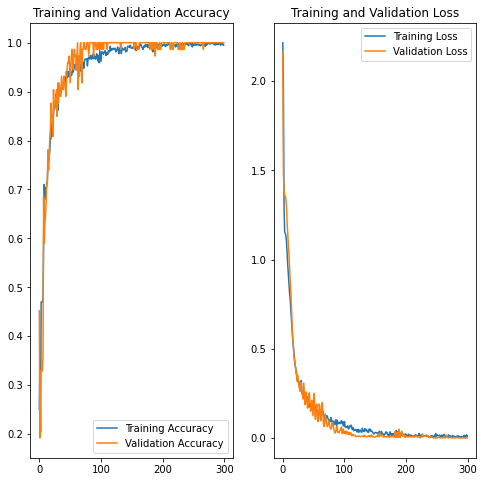

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

#epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Save Model

In [26]:
#model.save_weights('./back_front_v000') # only saves the weights, not the structure
model.save('mtg_back_front_classifier_v%03d' % VERSION)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mtg_back_front_classifier_v003/assets
